In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Housing.csv')
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
data['mainroad'] = LabelEncoder().fit_transform(data['mainroad'])
data['guestroom'] = LabelEncoder().fit_transform(data['guestroom'])
data['basement'] = LabelEncoder().fit_transform(data['basement'])
data['hotwaterheating'] = LabelEncoder().fit_transform(data['hotwaterheating'])
data['airconditioning'] = LabelEncoder().fit_transform(data['airconditioning'])
data['prefarea'] = LabelEncoder().fit_transform(data['prefarea'])
data['furnishingstatus'] = LabelEncoder().fit_transform(data['furnishingstatus'])

In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


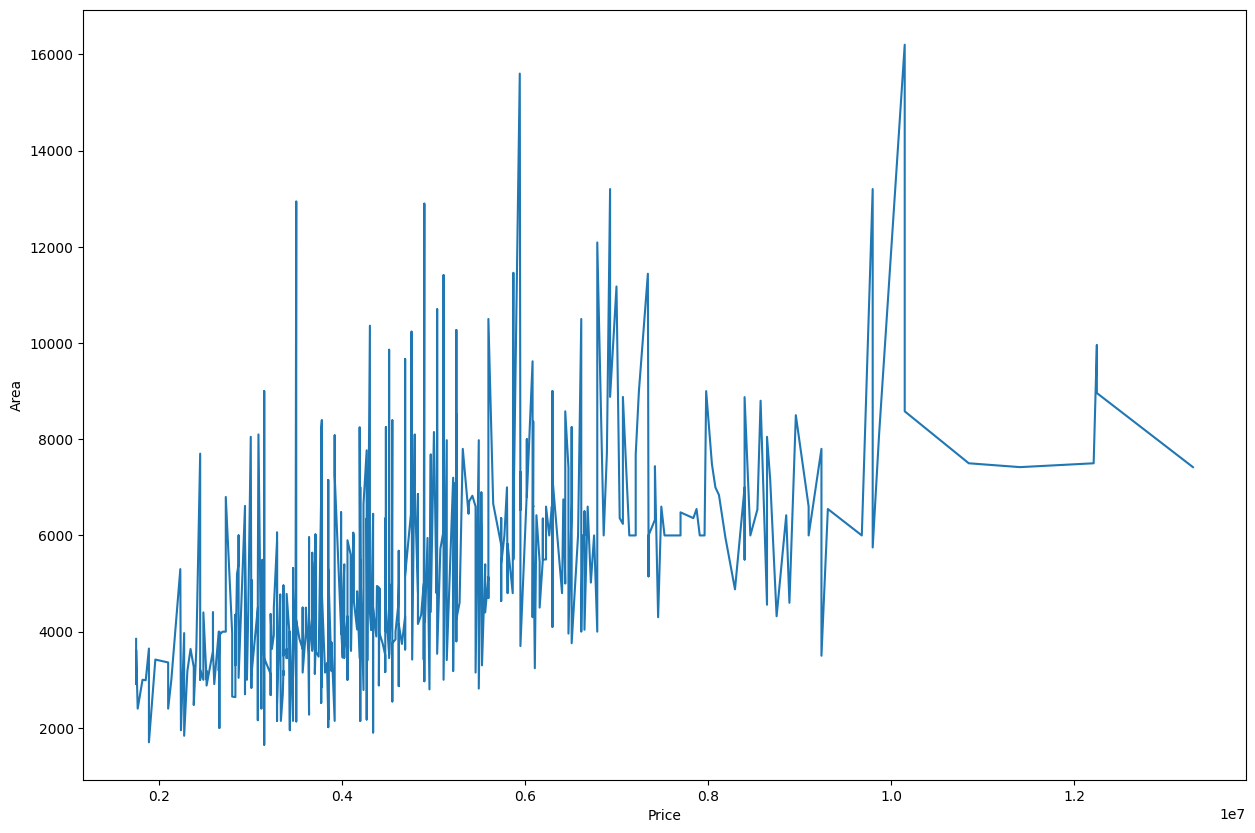

In [5]:
plt.figure(figsize=(15,10))
plt.plot(data['price'],data['area'])
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

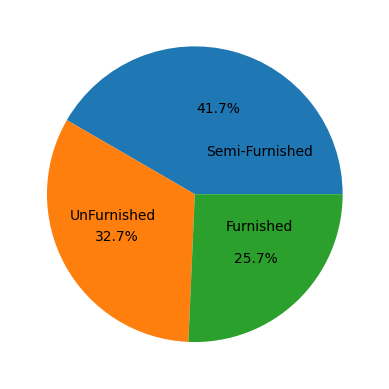

In [6]:
labels = ['Semi-Furnished','UnFurnished','Furnished']
plt.pie(data['furnishingstatus'].value_counts(),labels = labels,autopct = '%1.1f%%',labeldistance=0.3)
plt.show()

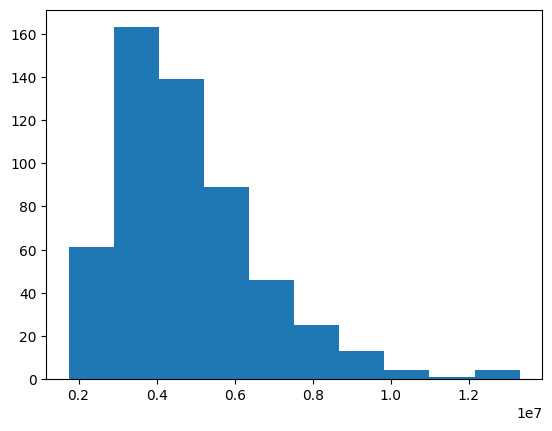

In [7]:
plt.hist(data['price'])
plt.show()

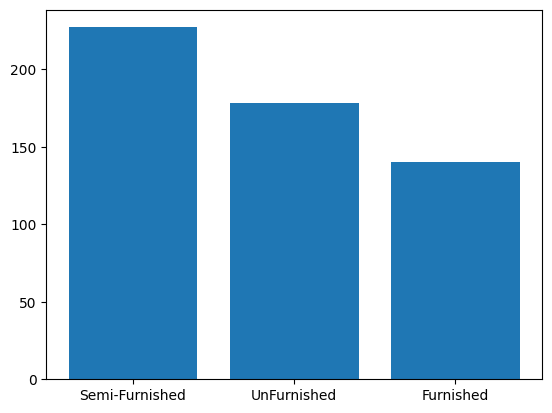

In [8]:
x = ['Semi-Furnished','UnFurnished','Furnished']
plt.bar(x,data['furnishingstatus'].value_counts())
plt.show()

In [9]:
X = data.drop("price", axis=1)
y = data["price"]
print(X)
print(y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = DecisionTreeRegressor()
model.fit(X,y)
y_pred = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy_score = model.score(X_test, y_test)

print(f'Accuracy Score: {accuracy_score*100:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Accuracy Score: 100.00
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R²) Score: 1.00
Root Mean Squared Error (RMSE): 0.00


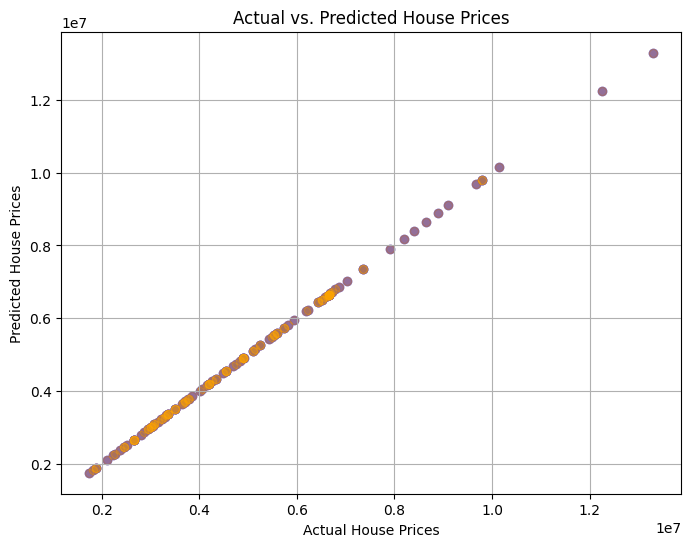

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.7, label='Actual House Prices')
plt.scatter(y_test, y_pred, color='Orange', alpha=0.4, label='Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()